# DS-7331 Machine Learning Mini Project
## Airbnb Price Data - Logistic and SVM
### Allen Miller, Ana Glaser, Jake Harrison, Lola Awodipe

https://nbviewer.jupyter.org/github/allenmiller17/SMU_7331_ML1_Project_1/blob/main/Project_1_Final_Write_Up.ipynb

In [ ]:
import warnings
#warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats

from sklearn import metrics

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
labels_path = "/content/drive/My Drive/DLCP/ANNProject/airbnb.csv"

In [ ]:
pdata = pd.read_csv(labels_path)

In [ ]:
#importing the data
#pdata = pd.read_csv("airbnb.csv")
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   price                   74111 non-null  float64
 2   log_price               74111 non-null  float64
 3   property_type           74111 non-null  object 
 4   room_type               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

### Business Understanding

In [ ]:
#unlogging the logged price data field for easier interpretation
#pdata['price'] = np.exp(pdata.log_price)
pdata = pdata.dropna()

In [ ]:
#value_list = ["Apartment","House","Condominium","Loft","Townhouse"]
#value_list = ["Apartment","House"]
value_list = ["Apartment"]
boolean_series = ~pdata.property_type.isin(value_list)
filtered_df = pdata[boolean_series]

filtered_df.head(100)

for i in list (filtered_df.index):
    pdata.loc[i,'property_type'] = "other"

pdata["region"] = pd.cut(pdata.longitude,[-200,-100,0],2,labels=["West","East"])

In [ ]:
pdata.head()

,id,price,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,region
1,6304928,169.0,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,8/5/2017,t,f,100%,6/19/2017,t,9/23/2017,40.766115,-73.989040,Hell's Kitchen,6,93.0,10019,3.0,3.0,East
2,7919400,145.0,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,4/30/2017,t,t,100%,10/25/2016,t,9/14/2017,40.808110,-73.943756,Harlem,10,92.0,10027,1.0,3.0,East
4,3808709,115.0,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",5/12/2015,t,t,100%,3/1/2015,t,1/22/2017,38.925627,-77.034596,Columbia Heights,4,40.0,20009,0.0,1.0,East
5,12422935,85.0,4.442651,Apartment,Private room,2,1.0,Real Bed,strict,True,SF,Beautiful private room overlooking scenic view...,8/27/2017,t,t,100%,6/7/2017,t,9/5/2017,37.753164,-122.429526,Noe Valley,3,100.0,94131,1.0,1.0,West
7,13971273,120.0,4.787492,other,Entire home/apt,2,1.0,Real Bed,moderate,True,LA,Arguably the best location (and safest) in dow...,12/16/2016,t,t,100%,5/18/2013,f,4/12/2017,34.046737,-118.260439,Downtown,9,93.0,90015,1.0,1.0,West


replaceStruct = {
                "cleaning_fee":     {True: 1, False: 0},
                "instant_bookable":     {"t": 1, "f": 0},
                "host_has_profile_pic":     {"t": 1, "f": 0},
                "host_identity_verified":     {"t": 1, "f": 0},
                 "property_type":     {"Apartment": 1, "House": 2, "other": 3},
                    }

pdata=pdata.replace(replaceStruct)
pdata.head()

In [ ]:
replaceStruct = {
                "cleaning_fee":     {True: 1, False: 0},
                "instant_bookable":     {"t": 1, "f": 0},
                "host_has_profile_pic":     {"t": 1, "f": 0},
                "host_identity_verified":     {"t": 1, "f": 0},
                 "property_type":     {"Apartment": 1, "other": 2},
                    }

pdata=pdata.replace(replaceStruct)
pdata.head()

,id,price,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,region
1,6304928,169.0,5.129899,1,Entire home/apt,7,1.0,Real Bed,strict,1,NYC,Enjoy travelling during your stay in Manhattan...,8/5/2017,1,0,100%,6/19/2017,1,9/23/2017,40.766115,-73.989040,Hell's Kitchen,6,93.0,10019,3.0,3.0,East
2,7919400,145.0,4.976734,1,Entire home/apt,5,1.0,Real Bed,moderate,1,NYC,The Oasis comes complete with a full backyard ...,4/30/2017,1,1,100%,10/25/2016,1,9/14/2017,40.808110,-73.943756,Harlem,10,92.0,10027,1.0,3.0,East
4,3808709,115.0,4.744932,1,Entire home/apt,2,1.0,Real Bed,moderate,1,DC,"Cool, cozy, and comfortable studio located in ...",5/12/2015,1,1,100%,3/1/2015,1,1/22/2017,38.925627,-77.034596,Columbia Heights,4,40.0,20009,0.0,1.0,East
5,12422935,85.0,4.442651,1,Private room,2,1.0,Real Bed,strict,1,SF,Beautiful private room overlooking scenic view...,8/27/2017,1,1,100%,6/7/2017,1,9/5/2017,37.753164,-122.429526,Noe Valley,3,100.0,94131,1.0,1.0,West
7,13971273,120.0,4.787492,2,Entire home/apt,2,1.0,Real Bed,moderate,1,LA,Arguably the best location (and safest) in dow...,12/16/2016,1,1,100%,5/18/2013,0,4/12/2017,34.046737,-118.260439,Downtown,9,93.0,90015,1.0,1.0,West


In [ ]:
pdata.nunique()

In [ ]:


oneHotCols=["room_type","bed_type","neighbourhood","city","cancellation_policy","cleaning_fee","region"]
#oneHotCols=["room_type","bed_type","city","cancellation_policy","region","neighbourhood"]
#pdata.drop(['description','neighbourhood','host_response_rate','first_review','host_since','last_review','zipcode','id','latitude','longitude'], axis=1, inplace=True)
pdata.drop(['description','host_response_rate','first_review','host_since','last_review','zipcode','id','latitude','longitude'], axis=1, inplace=True)
pdata=pd.get_dummies(pdata, columns=oneHotCols)
pdata.head(10)

,price,log_price,property_type,accommodates,bathrooms,host_has_profile_pic,host_identity_verified,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,neighbourhood_16th Street Heights,neighbourhood_Adams Morgan,neighbourhood_Alamo Square,neighbourhood_Albany Park,neighbourhood_Alhambra,neighbourhood_Allerton,neighbourhood_Allston-Brighton,neighbourhood_Alphabet City,neighbourhood_Altadena,neighbourhood_American University Park,neighbourhood_Anacostia,neighbourhood_Andersonville,neighbourhood_Annadale,neighbourhood_Arboretum,neighbourhood_Arcadia,neighbourhood_Archer Heights,neighbourhood_Arleta,neighbourhood_Armour Square,neighbourhood_Arts District,neighbourhood_Ashburn,...,neighbourhood_West Village,neighbourhood_Westchester Village,neighbourhood_Westchester/Playa Del Rey,neighbourhood_Westerleigh,neighbourhood_Western Addition/NOPA,neighbourhood_Westlake,neighbourhood_Westmont,neighbourhood_Westside,neighbourhood_Westwood,neighbourhood_Whitestone,neighbourhood_Whittier,neighbourhood_Wicker Park,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Winnetka,neighbourhood_Woodhaven,neighbourhood_Woodland,neighbourhood_Woodland Hills/Warner Center,neighbourhood_Woodlawn,neighbourhood_Woodley Park,neighbourhood_Woodridge,neighbourhood_Woodside,neighbourhood_Wrigleyville,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,cleaning_fee_0,cleaning_fee_1,region_West,region_East
1,169.0,5.129899,1,7,1.0,1,0,1,6,93.0,3.0,3.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1
2,145.0,4.976734,1,5,1.0,1,1,1,10,92.0,1.0,3.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1
4,115.0,4.744932,1,2,1.0,1,1,1,4,40.0,0.0,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1
5,85.0,4.442651,1,2,1.0,1,1,1,3,100.0,1.0,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0
7,120.0,4.787492,2,2,1.0,1,1,0,9,93.0,1.0,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0
8,120.0,4.787492,2,2,1.0,1,0,0,159,99.0,1.0,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0
10,100.0,4.605170,1,2,1.0,1,1,0,82,93.0,1.0,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1
11,150.0,5.010635,2,4,1.5,1,1,0,29,97.0,2.0,2.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0
13,200.0,5.298317,1,6,1.5,1,1,1,13,89.0,2.0,3.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1
17,99.0,4.595120,2,2,2.0,1,1,0,12,88.0,1.0,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1


In [ ]:
print(pdata)

In [ ]:

X = pdata.drop('property_type',axis=1)     
Y = pdata['property_type']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

x_train.head()

,price,log_price,accommodates,bathrooms,host_has_profile_pic,host_identity_verified,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,neighbourhood_16th Street Heights,neighbourhood_Adams Morgan,neighbourhood_Alamo Square,neighbourhood_Albany Park,neighbourhood_Alhambra,neighbourhood_Allerton,neighbourhood_Allston-Brighton,neighbourhood_Alphabet City,neighbourhood_Altadena,neighbourhood_American University Park,neighbourhood_Anacostia,neighbourhood_Andersonville,neighbourhood_Annadale,neighbourhood_Arboretum,neighbourhood_Arcadia,neighbourhood_Archer Heights,neighbourhood_Arleta,neighbourhood_Armour Square,neighbourhood_Arts District,neighbourhood_Ashburn,neighbourhood_Astoria,...,neighbourhood_West Village,neighbourhood_Westchester Village,neighbourhood_Westchester/Playa Del Rey,neighbourhood_Westerleigh,neighbourhood_Western Addition/NOPA,neighbourhood_Westlake,neighbourhood_Westmont,neighbourhood_Westside,neighbourhood_Westwood,neighbourhood_Whitestone,neighbourhood_Whittier,neighbourhood_Wicker Park,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Winnetka,neighbourhood_Woodhaven,neighbourhood_Woodland,neighbourhood_Woodland Hills/Warner Center,neighbourhood_Woodlawn,neighbourhood_Woodley Park,neighbourhood_Woodridge,neighbourhood_Woodside,neighbourhood_Wrigleyville,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,cleaning_fee_0,cleaning_fee_1,region_West,region_East
36694,92.0,4.521789,2,1.0,1,1,0,153,99.0,1.0,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0
50548,150.0,5.010635,3,1.0,1,1,0,10,100.0,1.0,2.0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1
7142,60.0,4.094345,2,1.0,1,1,0,34,92.0,1.0,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1
36775,280.0,5.634790,2,1.0,1,0,1,3,87.0,0.0,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1
65349,220.0,5.393628,4,1.0,1,1,0,3,100.0,1.0,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler
ScaleObj = StandardScaler()
ScaleObj.fit(x_train)

X_train_scaled = ScaleObj.transform(x_train)
X_test_scaled = ScaleObj.transform(x_test)

In [ ]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(pdata.index)) * 100))

80.00% data is in training set
20.00% data is in test set


In [ ]:

# Fit the model on train
modelFIRST = LogisticRegression(solver="liblinear")
modelFIRST.fit(X_train_scaled, y_train)
#predict on test
y_predict = modelFIRST.predict(X_test_scaled)


coef_df = pd.DataFrame(modelFIRST.coef_)
coef_df['intercept'] = modelFIRST.intercept_
print(coef_df)

          0         1         2  ...       622       623  intercept
0  0.205204  0.279382 -0.003498  ...  0.268395 -0.268395   -0.83368

[1 rows x 625 columns]


In [ ]:
coef_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,intercept
0,0.205204,0.279382,-0.003498,0.319713,0.002386,-0.038592,-0.014984,0.101225,0.073043,0.110159,0.10194,-0.342764,0.317105,0.093723,-0.027548,-0.033409,-0.005096,0.000975,0.025459,0.064496,0.026105,-0.070177,0.012583,0.027855,0.000516,0.068523,-0.151457,0.122118,0.044476,0.060009,0.016601,0.056226,-0.030841,0.083704,0.074591,0.0,-0.039254,0.001686,0.051129,0.018696,...,0.051794,0.023652,0.012812,-0.104274,-0.069846,0.005214,-0.008914,-0.077077,0.012274,0.049593,0.035098,0.05126,-0.054533,0.066455,0.013837,0.044024,0.110583,0.05187,0.115262,0.044599,0.011596,0.031434,-0.010719,-0.00105,-0.007353,-0.08563,-0.070669,0.127296,-0.179318,0.251188,-0.008543,0.010876,-0.004949,-0.016471,0.116088,-0.006857,0.006857,0.268395,-0.268395,-0.83368


In [ ]:
model_score = modelFIRST.score(X_test_scaled, y_test)
print(model_score)

0.7691408533021625


In [ ]:
modelFIRST.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Trainig accuracy 0.7801870251315021

Testing accuracy 0.7691408533021625

Confusion Matrix


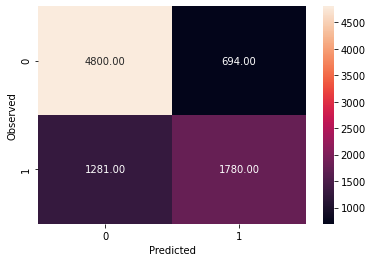

None


In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

print("Trainig accuracy",modelFIRST.score(X_train_scaled,y_train))  
print()
print("Testing accuracy",modelFIRST.score(X_test_scaled, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))


In [ ]:
modelGRID = LogisticRegression()

parameters = {'penalty': ['l2'],
             'C': [.001,.75],
             'solver': ['newton-cg','liblinear','sag','saga'],
              'max_iter':[100,500]
            }

In [ ]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(modelGRID,n_jobs=25,param_grid=parameters,cv=3,scoring='accuracy')
gs.fit(X_train_scaled, y_train)
gs.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


{'C': 0.75, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}

In [50]:
gs.cv_results_['params']

[{'C': 0.001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'},
 {'C': 0.001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'},
 {'C': 0.001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'sag'},
 {'C': 0.001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'},
 {'C': 0.001, 'max_iter': 500, 'penalty': 'l2', 'solver': 'newton-cg'},
 {'C': 0.001, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'},
 {'C': 0.001, 'max_iter': 500, 'penalty': 'l2', 'solver': 'sag'},
 {'C': 0.001, 'max_iter': 500, 'penalty': 'l2', 'solver': 'saga'},
 {'C': 0.75, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'},
 {'C': 0.75, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'},
 {'C': 0.75, 'max_iter': 100, 'penalty': 'l2', 'solver': 'sag'},
 {'C': 0.75, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'},
 {'C': 0.75, 'max_iter': 500, 'penalty': 'l2', 'solver': 'newton-cg'},
 {'C': 0.75, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'},
 {'C': 0.75, 'max_iter': 500, '

In [ ]:
gs.cv_results_['mean_test_score']

array([0.76995901, 0.7687608 , 0.76998823, 0.76998823, 0.76995901,
       0.7687608 , 0.76998823, 0.76998823, 0.77019278, 0.77039733,
       0.77019278, 0.7704558 , 0.77019278, 0.77039733, 0.77028045,
       0.77030968])

In [ ]:
#Starting with L2
train_score=[]
test_score=[]
solver = ['newton-cg','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.001,solver=i, max_iter=500)  # changing values of solver
    model.fit(X_train_scaled, y_train) 
    y_predict = model.predict(X_test_scaled)     
    train_score.append(round(model.score(X_train_scaled, y_train),3))
    test_score.append(round(model.score(X_test_scaled, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'liblinear', 'sag', 'saga']

[0.78, 0.779, 0.78, 0.78]

[0.767, 0.765, 0.767, 0.767]


In [ ]:
pdata.nunique()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber", "perceptron"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2"],
}
clf = SGDClassifier()
grid = GridSearchCV(clf, param_grid=params, cv=3)
grid.fit(X_train_scaled, y_train)
print(grid.best_params_)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


{'alpha': 0.01, 'loss': 'log', 'penalty': 'l2'}


In [ ]:
from sklearn.linear_model import SGDClassifier

svm_model = SGDClassifier(alpha= 0.01, loss= 'log', penalty='l2')
svm_model.fit(X_train_scaled, y_train)


SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
grid_predictions = svm_model.predict(X_test_scaled)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, grid_predictions)))

Accuracy: 0.77
